In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [31]:
flights_raw= pd.read_csv('/Users/vickichen/Desktop/flight/midterm-project/data/flights.csv')
flights_raw


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-05-31,WN,WN,WN,2081,WN,N402WN,2081,10800,BUR,...,326,0.0,0.0,51.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2019-04-20,AA,AA,AA,2244,AA,N895NN,2244,13930,ORD,...,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-13,WN,WN,WN,1731,WN,N8507C,1731,13495,MSY,...,302,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
3,2018-11-20,AA,AA,AA,2620,AA,N961AN,2620,11298,DFW,...,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-28,DL,DL_CODESHARE,DL,4060,9E,N833AY,4060,12478,JFK,...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2018-01-10,DL,DL_CODESHARE,DL,5584,EV,N582CA,5584,13367,MLI,...,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199996,2018-07-25,AA,AA,AA,2807,AA,N936AN,2807,15304,TPA,...,204,10.0,0.0,85.0,0.0,17.0,NaN,NaN,NaN,NaN
199997,2019-11-19,UA,UA_CODESHARE,UA,3419,YX,N632RW,3419,11618,EWR,...,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199998,2018-08-29,AS,AS,AS,1323,AS,N627VA,1323,14771,SFO,...,550,0.0,0.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN


### Dop columns if columns has more than 80% of null values

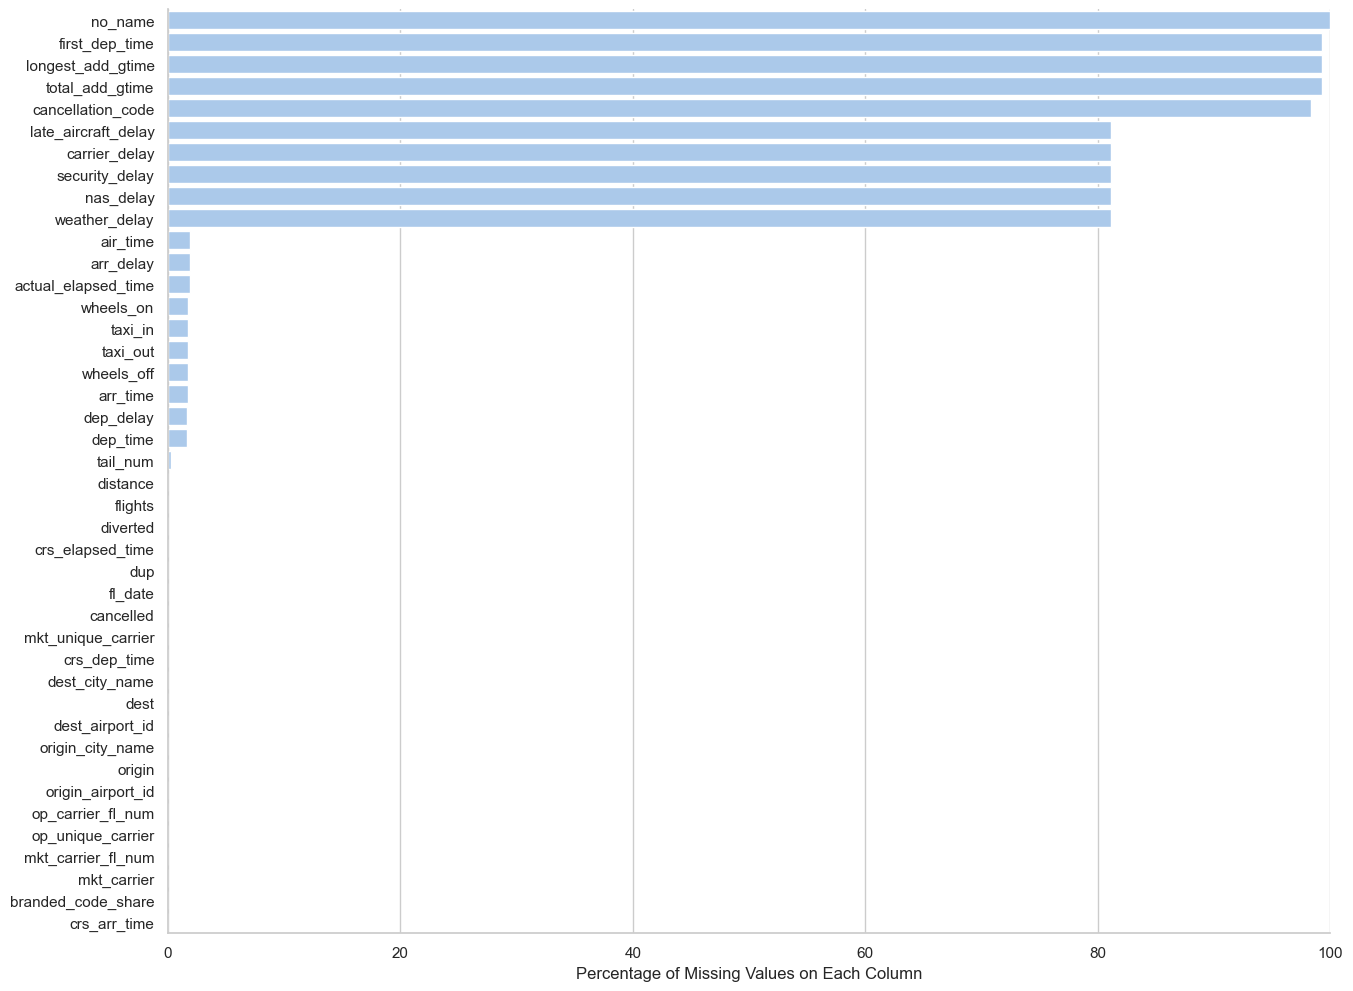

In [32]:

flights_raw_length = len(flights_raw)
flights_raw_null = (flights_raw.isnull().sum().sort_values(ascending=False)*100/len(flights_raw))
f, ax = plt.subplots(figsize=(15, 12))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Percentage of Missing Values on Each Column")
sns.barplot(x=flights_raw_null.values, y=flights_raw_null.index, color="b")
sns.despine()

In [33]:
flights_raw = flights_raw.drop(columns = ['no_name', 'first_dep_time','longest_add_gtime','total_add_gtime','cancellation_code','late_aircraft_delay','carrier_delay','security_delay',
                                          'nas_delay','weather_delay'],axis=1)

In [34]:
flights_raw

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-05-31,WN,WN,WN,2081,WN,N402WN,2081,10800,BUR,...,1311.0,51.0,0,0,N,80,93.0,68.0,1,326
1,2019-04-20,AA,AA,AA,2244,AA,N895NN,2244,13930,ORD,...,1509.0,-35.0,0,0,N,153,126.0,101.0,1,801
2,2019-02-13,WN,WN,WN,1731,WN,N8507C,1731,13495,MSY,...,2303.0,18.0,0,0,N,75,64.0,55.0,1,302
3,2018-11-20,AA,AA,AA,2620,AA,N961AN,2620,11298,DFW,...,2155.0,13.0,0,0,N,128,142.0,102.0,1,761
4,2018-08-28,DL,DL_CODESHARE,DL,4060,9E,N833AY,4060,12478,JFK,...,1503.0,-34.0,0,0,N,98,70.0,51.0,1,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2018-01-10,DL,DL_CODESHARE,DL,5584,EV,N582CA,5584,13367,MLI,...,2025.0,-5.0,0,0,N,115,119.0,91.0,1,633
199996,2018-07-25,AA,AA,AA,2807,AA,N936AN,2807,15304,TPA,...,1838.0,112.0,0,0,N,71,156.0,54.0,1,204
199997,2019-11-19,UA,UA_CODESHARE,UA,3419,YX,N632RW,3419,11618,EWR,...,1039.0,-23.0,0,0,N,137,123.0,80.0,1,488
199998,2018-08-29,AS,AS,AS,1323,AS,N627VA,1323,14771,SFO,...,1011.0,20.0,0,0,N,101,124.0,79.0,1,550


In [35]:
##dropping rows where there are cancellation of flight, cancellation flights are not going to effect delays, 0 meaning not cancelled
index_cancelled = flights_raw.loc[flights_raw['cancelled'] == 1].index
flights_raw.drop(index_cancelled,inplace=True)
#Drop diverted flights. 0 meaning not diverted
index_cancelled = flights_raw.loc[flights_raw['diverted'] == 1].index
flights_raw.drop(index_cancelled,inplace=True)



In [36]:
flights_raw

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-05-31,WN,WN,WN,2081,WN,N402WN,2081,10800,BUR,...,1311.0,51.0,0,0,N,80,93.0,68.0,1,326
1,2019-04-20,AA,AA,AA,2244,AA,N895NN,2244,13930,ORD,...,1509.0,-35.0,0,0,N,153,126.0,101.0,1,801
2,2019-02-13,WN,WN,WN,1731,WN,N8507C,1731,13495,MSY,...,2303.0,18.0,0,0,N,75,64.0,55.0,1,302
3,2018-11-20,AA,AA,AA,2620,AA,N961AN,2620,11298,DFW,...,2155.0,13.0,0,0,N,128,142.0,102.0,1,761
4,2018-08-28,DL,DL_CODESHARE,DL,4060,9E,N833AY,4060,12478,JFK,...,1503.0,-34.0,0,0,N,98,70.0,51.0,1,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2018-01-10,DL,DL_CODESHARE,DL,5584,EV,N582CA,5584,13367,MLI,...,2025.0,-5.0,0,0,N,115,119.0,91.0,1,633
199996,2018-07-25,AA,AA,AA,2807,AA,N936AN,2807,15304,TPA,...,1838.0,112.0,0,0,N,71,156.0,54.0,1,204
199997,2019-11-19,UA,UA_CODESHARE,UA,3419,YX,N632RW,3419,11618,EWR,...,1039.0,-23.0,0,0,N,137,123.0,80.0,1,488
199998,2018-08-29,AS,AS,AS,1323,AS,N627VA,1323,14771,SFO,...,1011.0,20.0,0,0,N,101,124.0,79.0,1,550


### Question??? We can drop the cancelled and diverted columns entirely since now all the flights are not cancelled and diverted in the dataset?? 

In [37]:
#Drop cancelled and diverted columns. 
flights_raw = flights_raw.drop(columns = ['cancelled','diverted'],axis=1)

In [39]:
flights_raw

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-05-31,WN,WN,WN,2081,WN,N402WN,2081,10800,BUR,...,7.0,1220,1311.0,51.0,N,80,93.0,68.0,1,326
1,2019-04-20,AA,AA,AA,2244,AA,N895NN,2244,13930,ORD,...,8.0,1544,1509.0,-35.0,N,153,126.0,101.0,1,801
2,2019-02-13,WN,WN,WN,1731,WN,N8507C,1731,13495,MSY,...,4.0,2245,2303.0,18.0,N,75,64.0,55.0,1,302
3,2018-11-20,AA,AA,AA,2620,AA,N961AN,2620,11298,DFW,...,10.0,2142,2155.0,13.0,N,128,142.0,102.0,1,761
4,2018-08-28,DL,DL_CODESHARE,DL,4060,9E,N833AY,4060,12478,JFK,...,3.0,1537,1503.0,-34.0,N,98,70.0,51.0,1,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2018-01-10,DL,DL_CODESHARE,DL,5584,EV,N582CA,5584,13367,MLI,...,15.0,2030,2025.0,-5.0,N,115,119.0,91.0,1,633
199996,2018-07-25,AA,AA,AA,2807,AA,N936AN,2807,15304,TPA,...,89.0,1646,1838.0,112.0,N,71,156.0,54.0,1,204
199997,2019-11-19,UA,UA_CODESHARE,UA,3419,YX,N632RW,3419,11618,EWR,...,7.0,1102,1039.0,-23.0,N,137,123.0,80.0,1,488
199998,2018-08-29,AS,AS,AS,1323,AS,N627VA,1323,14771,SFO,...,3.0,951,1011.0,20.0,N,101,124.0,79.0,1,550


In [38]:
flights_raw.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance                 int64
dtype: object

In [40]:
flights_raw.isnull().sum()

fl_date                 0
mkt_unique_carrier      0
branded_code_share      0
mkt_carrier             0
mkt_carrier_fl_num      0
op_unique_carrier       0
tail_num                0
op_carrier_fl_num       0
origin_airport_id       0
origin                  0
origin_city_name        0
dest_airport_id         0
dest                    0
dest_city_name          0
crs_dep_time            0
dep_time                0
dep_delay              47
taxi_out               82
wheels_off             82
wheels_on              82
taxi_in                82
crs_arr_time            0
arr_time                0
arr_delay              33
dup                     0
crs_elapsed_time        0
actual_elapsed_time     0
air_time               82
flights                 0
distance                0
dtype: int64

In [41]:
#Fill dep_delay, taxi_out, wheels_off, wheels_on. taxi_in, arr_delay, air_time null with 0
nulls_count = ['dep_delay','taxi_out','wheels_off','wheels_on','taxi_in','arr_delay','air_time']
flights_raw[nulls_count] = flights_raw[nulls_count].fillna(0)

In [42]:
flights_raw.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [43]:
flights_raw

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-05-31,WN,WN,WN,2081,WN,N402WN,2081,10800,BUR,...,7.0,1220,1311.0,51.0,N,80,93.0,68.0,1,326
1,2019-04-20,AA,AA,AA,2244,AA,N895NN,2244,13930,ORD,...,8.0,1544,1509.0,-35.0,N,153,126.0,101.0,1,801
2,2019-02-13,WN,WN,WN,1731,WN,N8507C,1731,13495,MSY,...,4.0,2245,2303.0,18.0,N,75,64.0,55.0,1,302
3,2018-11-20,AA,AA,AA,2620,AA,N961AN,2620,11298,DFW,...,10.0,2142,2155.0,13.0,N,128,142.0,102.0,1,761
4,2018-08-28,DL,DL_CODESHARE,DL,4060,9E,N833AY,4060,12478,JFK,...,3.0,1537,1503.0,-34.0,N,98,70.0,51.0,1,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2018-01-10,DL,DL_CODESHARE,DL,5584,EV,N582CA,5584,13367,MLI,...,15.0,2030,2025.0,-5.0,N,115,119.0,91.0,1,633
199996,2018-07-25,AA,AA,AA,2807,AA,N936AN,2807,15304,TPA,...,89.0,1646,1838.0,112.0,N,71,156.0,54.0,1,204
199997,2019-11-19,UA,UA_CODESHARE,UA,3419,YX,N632RW,3419,11618,EWR,...,7.0,1102,1039.0,-23.0,N,137,123.0,80.0,1,488
199998,2018-08-29,AS,AS,AS,1323,AS,N627VA,1323,14771,SFO,...,3.0,951,1011.0,20.0,N,101,124.0,79.0,1,550


In [48]:
flights_raw.to_csv('/Users/vickichen/Desktop/flight/midterm-project/data/flights_cleaned.csv')